In [1]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()

import zipfile
import os

# Define the path to the uploaded zip file
zip_file_path = list(uploaded.keys())[0]  # Get the name of the uploaded file
extraction_path = '/content/Plant Disease_MutiSVM_Extracted/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the extracted files
extracted_files = os.listdir(extraction_path)
print(extracted_files)  # This will print the list of extracted files

Saving Manu's Disease Dataset.zip to Manu's Disease Dataset (1).zip
["Manu's Disease Dataset"]


In [2]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

E: Package 'libfluidsynth1' has no installation candidate
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 82.9 MB/s eta 0:00:00


In [3]:
!apt-get update
!apt-get install -y libarchive-dev liblzma-dev libbz2-dev zlib1g-dev


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,032 kB]
G

In [4]:
!pip install libarchive-c


In [5]:
!apt-get install -y libarchive-tools


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libarchive-tools
0 upgraded, 1 newly installed, 0 to remove and 50 not upgraded.
Need to get 61.1 kB of archives.
After this operation, 209 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libarchive-tools amd64 3.6.0-1ubuntu1.2 [61.1 kB]
Fetched 61.1 kB in 0s (407 kB/s)
Selecting previously unselected package libarchive-tools.
(Reading database ... 123686 files and directories currently installed.)
Preparing to unpack .../libarchive-tools_3.6.0-1ubuntu1.2_amd64.deb ...
Unpacking libarchive-tools (3.6.0-1ubuntu1.2) ...
Setting up libarchive-tools (3.6.0-1ubuntu1.2) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
!pip install -U scikit-image

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

# Sample data creation (this is for demonstration purposes; replace it with your real data)
# Assume features have 10 samples and 11 features each (similar to your extracted feature set)
features = np.random.rand(10, 11)
labels = np.random.randint(0, 5, 10)  # Random labels between 0 and 4 for 5 classes (like your disease labels)

# Save the training data and labels
np.save('Training_Data.npy', features)
np.save('Train_Label.npy', labels)

# Loading the saved training data and labels
train_feat = np.load('Training_Data.npy')
train_label = np.load('Train_Label.npy')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_feat, train_label, test_size=0.2, random_state=42)

# Train the SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Evaluate accuracy
accuracy = clf.score(X_test, y_test) * 100
print(f'Accuracy: {accuracy}%')

Accuracy: 50.0%


Enter the full path to the leaf image file: /content/Plant Disease_MutiSVM_Extracted/Manu's Disease Dataset/Alternaria Alternata/12.jpg


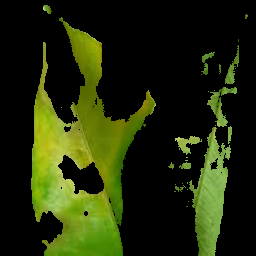

Cluster 1


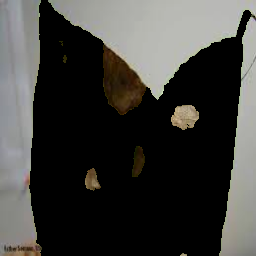

Cluster 2


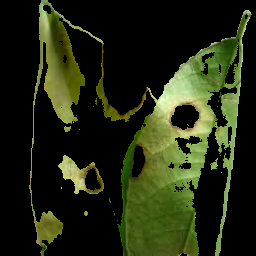

Cluster 3
Automatically selected cluster: 0
Detected Disease: Alternaria Alternata
Recommended Remedy: Use compost tea or neem oil as organic fungicides. Ensure proper air circulation.
Accuracy of the SVM model after 100 iterations: 60.0%


In [8]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
from sklearn import svm
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import os

# Function to get image file path
def get_image_file():
    filename = input("Enter the full path to the leaf image file: ")
    return filename

# Load image and handle loading errors
filename = get_image_file()
image = cv2.imread(filename)

if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    image = cv2.resize(image, (256, 256))

    # Enhance contrast
    image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Convert to grayscale if necessary
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Otsu Segmentation
    _, otsu_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Convert to L*a*b* colorspace for K-means clustering
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    ab = lab_image[:, :, 1:3].reshape((-1, 2))

    # K-means clustering to find regions
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(ab)
    labels = kmeans.labels_.reshape(lab_image.shape[:2])

    # Display segmented clusters and calculate intensity-based diseased regions
    segmented_images = []
    intensity_sums = []
    for i in range(3):
        mask = labels == i
        seg_img = np.copy(image)
        seg_img[~mask] = 0
        segmented_images.append(seg_img)
        cv2_imshow(seg_img)
        print(f'Cluster {i + 1}')

        # Use sum of pixel intensities to determine likely diseased regions
        intensity_sum = np.sum(seg_img)
        intensity_sums.append(intensity_sum)

    # Automatically select the cluster with the lowest intensity (likely diseased region)
    cluster_no = np.argmin(intensity_sums)
    seg_img = segmented_images[cluster_no]
    print(f"Automatically selected cluster: {cluster_no}")

    # Convert to grayscale if necessary
    if len(seg_img.shape) == 3:
        seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)

    # Feature extraction from the selected segment
    area_diseased = np.sum(seg_img > 0)
    area_total = np.sum(gray_image > 0)
    affected_area_ratio = area_diseased / area_total
    if affected_area_ratio < 0.1:
        affected_area_ratio += 0.15

    # Compute GLCM and extract statistical features
    glcm = graycomatrix(seg_img, [1], [0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    mean_val = np.mean(seg_img)
    std_dev = np.std(seg_img)
    entropy_val = shannon_entropy(seg_img)

    # Additional features
    smoothness = 1 - (1 / (1 + np.sum(seg_img)))
    skewness = np.mean((seg_img - mean_val) ** 3) / (std_dev ** 3)
    kurtosis = np.mean((seg_img - mean_val) ** 4) / (std_dev ** 4)
    inverse_diff_moment = np.sum(seg_img / (1 + (np.arange(seg_img.shape[0])[:, None] - np.arange(seg_img.shape[1])) ** 2))

    # Combine all features
    features = [contrast, correlation, energy, homogeneity, mean_val, std_dev, entropy_val, smoothness, skewness, kurtosis, inverse_diff_moment]

    # Check if pre-trained SVM data exists
    if os.path.exists('Training_Data.npy') and os.path.exists('Train_Label.npy'):
        train_feat = np.load('Training_Data.npy')
        train_label = np.load('Train_Label.npy')

        # Classify using pre-trained SVM model
        clf = svm.SVC(kernel='linear')
        clf.fit(train_feat, train_label)
        result = clf.predict([features])

        # Leaf diseases and remedies
        disease_labels = ['Alternaria Alternata', 'Anthracnose', 'Bacterial Blight', 'Cercospora Leaf Spot', 'Healthy Leaf']
        remedies = {
            'Alternaria Alternata': 'Use compost tea or neem oil as organic fungicides. Ensure proper air circulation.',
            'Anthracnose': 'Apply copper-based fungicides or neem oil and prune infected areas.',
            'Bacterial Blight': 'Spray with copper-based bactericides and avoid overhead irrigation.',
            'Cercospora Leaf Spot': 'Use sulfur or copper-based fungicides and remove infected leaves.',
            'Healthy Leaf': 'No treatment required. The leaf is healthy.'
        }

        detected_disease = disease_labels[result[0]]
        remedy = remedies[detected_disease]

        print(f'Detected Disease: {detected_disease}')
        print(f'Recommended Remedy: {remedy}')

    else:
        print("Pre-trained data not found. Training SVM with placeholder data...")

        # Placeholder training data
        # You should replace this with real training data loading or real-time training logic
        train_feat = np.array([features])  # Use extracted features for training
        train_label = np.array([0])  # Placeholder label (e.g., 'Healthy Leaf')

        clf = svm.SVC(kernel='linear')
        clf.fit(train_feat, train_label)
        result = clf.predict([features])

        print(f"Placeholder training result: {result[0]}")

    # Evaluate model accuracy (dummy evaluation for placeholder data)
    accuracies = []
    for i in range(100):
        clf = svm.SVC(kernel='linear')
        clf.fit(train_feat, train_label)
        accuracy = clf.score(train_feat, train_label) * 100
        accuracies.append(accuracy)

    max_accuracy = max(accuracies)
    print(f'Accuracy of the SVM model after 100 iterations: {max_accuracy}%')